In [1]:
import numpy as np
import pandas as pd 

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

import glob
import cv2
import os


2.0.0


In [2]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
sampleSabmission = pd.read_csv("sampleSubmission.csv")

In [3]:
train.head(3)


,Id,X,Y,Z,Time
0,1,2481900,528800,586,1.299872
1,2,2488400,530200,11686,1.679518
2,3,2495000,518400,6386,1.952326


In [4]:
test.head(3)

,Id,X,Y,Z
0,1,2488500,511100,11286
1,2,2471600,529600,2386
2,3,2483100,521300,10986


In [5]:
sampleSabmission.head(3)

,Id,Predicted
0,1,0
1,2,0
2,3,0


In [6]:
X_train_orig = train[["X", "Y", "Z"]]
X_test_orig  = test[["X", "Y", "Z"]]
Y_train_orig = train["Time"]

X_train_orig = np.asarray(X_train_orig)
Y_train_orig = np.asarray(Y_train_orig)
X_test_orig = np.asarray(X_test_orig)

print(X_train_orig.shape)
print(X_test_orig.shape)
print(Y_train_orig.shape)


(1086557, 3)
(1086558, 3)
(1086557,)


Let us now scale the data. We will use [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) from sklearn library.

The transformation is given by:

> X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)) 

> X_scaled = X_std * (max - min) + min

In [7]:
scaler = MinMaxScaler(feature_range=(-1, 1), copy=True)
scaler.fit(X_train_orig)
print("Maximum values of X_train (X, Y, Z): " + str(scaler.data_max_))
print("Minimum values of X_train (X, Y, Z): " + str(scaler.data_min_))

# Use the same transform for both train and test data:
X_train_norm = scaler.transform(X_train_orig)
X_test_norm = scaler.transform(X_test_orig)

Maximum values of X_train (X, Y, Z): [2496500.  530500.   12986.]
Minimum values of X_train (X, Y, Z): [ 2.469e+06  5.010e+05 -2.140e+02]


In [8]:
# create training and testing vars

X_train, X_val, y_train, y_val = train_test_split(X_train_norm, Y_train_orig, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(869245, 3)
(869245,)
(217312, 3)
(217312,)


In [16]:
model = keras.Sequential([
    keras.layers.Dense(128, input_dim=3, activation='elu'),
    keras.layers.Dense(64, activation="elu"),
    keras.layers.Dense(64, activation="elu"),
    keras.layers.Dense(32, activation="elu"),
    keras.layers.Dense(32, activation="elu"),
    keras.layers.Dense(1, activation="linear")
])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 16,097
Trainable params: 16,097
Non-trainable params: 0
__________________________________________________

In [17]:
model.compile(optimizer='adam',
              loss='MSE',
              metrics=['MAE'])

In [28]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=1024, epochs=300)

Train on 869245 samples, validate on 217312 samples
Epoch 1/300
869245/869245 [==============================] - 2s 3us/sample - loss: 6.2692e-06 - MAE: 0.0019 - val_loss: 5.0813e-06 - val_MAE: 0.0017
Epoch 2/300
869245/869245 [==============================] - 2s 3us/sample - loss: 6.1084e-06 - MAE: 0.0019 - val_loss: 3.6814e-06 - val_MAE: 0.0015
Epoch 3/300
869245/869245 [==============================] - 2s 3us/sample - loss: 6.0678e-06 - MAE: 0.0019 - val_loss: 3.6206e-06 - val_MAE: 0.0015
Epoch 4/300
869245/869245 [==============================] - 2s 3us/sample - loss: 6.6340e-06 - MAE: 0.0019 - val_loss: 3.9075e-06 - val_MAE: 0.0016
Epoch 5/300
869245/869245 [==============================] - 2s 3us/sample - loss: 6.1307e-06 - MAE: 0.0019 - val_loss: 1.4290e-05 - val_MAE: 0.0029
Epoch 6/300
869245/869245 [==============================] - 2s 3us/sample - loss: 5.8456e-06 - MAE: 0.0018 - val_loss: 1.8268e-05 - val_MAE: 0.0034
Epoch 7/300
869245/869245 [===========================

869245/869245 [==============================] - 2s 3us/sample - loss: 5.6278e-06 - MAE: 0.0017 - val_loss: 5.6988e-06 - val_MAE: 0.0018
Epoch 56/300
869245/869245 [==============================] - 2s 3us/sample - loss: 5.6582e-06 - MAE: 0.0018 - val_loss: 2.3602e-06 - val_MAE: 0.0012
Epoch 57/300
869245/869245 [==============================] - 2s 3us/sample - loss: 5.0495e-06 - MAE: 0.0017 - val_loss: 6.1442e-06 - val_MAE: 0.0020
Epoch 58/300
869245/869245 [==============================] - 2s 3us/sample - loss: 5.4863e-06 - MAE: 0.0018 - val_loss: 2.0291e-06 - val_MAE: 0.0011
Epoch 59/300
869245/869245 [==============================] - 2s 3us/sample - loss: 5.6609e-06 - MAE: 0.0018 - val_loss: 3.1705e-06 - val_MAE: 0.0014
Epoch 60/300
869245/869245 [==============================] - 2s 3us/sample - loss: 5.6039e-06 - MAE: 0.0018 - val_loss: 1.3542e-05 - val_MAE: 0.0030
Epoch 61/300
869245/869245 [==============================] - 2s 3us/sample - loss: 5.2529e-06 - MAE: 0.0017 - va

869245/869245 [==============================] - 2s 3us/sample - loss: 5.1216e-06 - MAE: 0.0017 - val_loss: 1.9971e-06 - val_MAE: 0.0011
Epoch 110/300
869245/869245 [==============================] - 2s 3us/sample - loss: 4.5740e-06 - MAE: 0.0016 - val_loss: 8.6584e-06 - val_MAE: 0.0024
Epoch 111/300
869245/869245 [==============================] - 2s 3us/sample - loss: 5.0632e-06 - MAE: 0.0017 - val_loss: 2.9536e-06 - val_MAE: 0.0013
Epoch 112/300
869245/869245 [==============================] - 2s 3us/sample - loss: 4.7036e-06 - MAE: 0.0016 - val_loss: 1.0337e-05 - val_MAE: 0.0026
Epoch 113/300
869245/869245 [==============================] - 2s 3us/sample - loss: 4.3610e-06 - MAE: 0.0016 - val_loss: 2.3054e-06 - val_MAE: 0.0012
Epoch 114/300
869245/869245 [==============================] - 2s 3us/sample - loss: 4.8864e-06 - MAE: 0.0016 - val_loss: 3.3326e-06 - val_MAE: 0.0014
Epoch 115/300
869245/869245 [==============================] - 2s 3us/sample - loss: 4.5576e-06 - MAE: 0.001

869245/869245 [==============================] - 2s 3us/sample - loss: 4.3750e-06 - MAE: 0.0016 - val_loss: 2.2189e-06 - val_MAE: 0.0011
Epoch 164/300
869245/869245 [==============================] - 2s 3us/sample - loss: 4.3189e-06 - MAE: 0.0015 - val_loss: 4.2303e-06 - val_MAE: 0.0016
Epoch 165/300
869245/869245 [==============================] - 2s 3us/sample - loss: 4.4188e-06 - MAE: 0.0016 - val_loss: 5.2213e-06 - val_MAE: 0.0020
Epoch 166/300
869245/869245 [==============================] - 2s 3us/sample - loss: 4.1465e-06 - MAE: 0.0015 - val_loss: 1.8865e-06 - val_MAE: 0.0011
Epoch 167/300
869245/869245 [==============================] - 2s 3us/sample - loss: 4.2503e-06 - MAE: 0.0016 - val_loss: 2.6832e-06 - val_MAE: 0.0013
Epoch 168/300
869245/869245 [==============================] - 2s 3us/sample - loss: 4.2927e-06 - MAE: 0.0015 - val_loss: 3.0931e-06 - val_MAE: 0.0013
Epoch 169/300
869245/869245 [==============================] - 2s 3us/sample - loss: 4.3918e-06 - MAE: 0.001

869245/869245 [==============================] - 2s 3us/sample - loss: 3.9937e-06 - MAE: 0.0015 - val_loss: 2.8247e-06 - val_MAE: 0.0013
Epoch 218/300
869245/869245 [==============================] - 2s 3us/sample - loss: 4.0872e-06 - MAE: 0.0015 - val_loss: 4.7211e-06 - val_MAE: 0.0018
Epoch 219/300
869245/869245 [==============================] - 2s 3us/sample - loss: 3.8747e-06 - MAE: 0.0015 - val_loss: 3.7096e-06 - val_MAE: 0.0015
Epoch 220/300
869245/869245 [==============================] - 2s 3us/sample - loss: 4.0257e-06 - MAE: 0.0015 - val_loss: 2.1349e-06 - val_MAE: 0.0011
Epoch 221/300
869245/869245 [==============================] - 2s 3us/sample - loss: 3.7054e-06 - MAE: 0.0015 - val_loss: 1.4581e-06 - val_MAE: 9.2380e-04
Epoch 222/300
869245/869245 [==============================] - 2s 3us/sample - loss: 4.1063e-06 - MAE: 0.0015 - val_loss: 7.7781e-06 - val_MAE: 0.0022
Epoch 223/300
869245/869245 [==============================] - 2s 3us/sample - loss: 3.7695e-06 - MAE: 0

869245/869245 [==============================] - 2s 3us/sample - loss: 3.5416e-06 - MAE: 0.0014 - val_loss: 1.7784e-06 - val_MAE: 0.0010
Epoch 272/300
869245/869245 [==============================] - 2s 3us/sample - loss: 3.6738e-06 - MAE: 0.0015 - val_loss: 2.1087e-06 - val_MAE: 0.0011
Epoch 273/300
869245/869245 [==============================] - 2s 3us/sample - loss: 3.7253e-06 - MAE: 0.0015 - val_loss: 6.5970e-06 - val_MAE: 0.0020
Epoch 274/300
869245/869245 [==============================] - 2s 3us/sample - loss: 3.7460e-06 - MAE: 0.0014 - val_loss: 1.1735e-05 - val_MAE: 0.0028
Epoch 275/300
869245/869245 [==============================] - 2s 3us/sample - loss: 3.6795e-06 - MAE: 0.0014 - val_loss: 2.1566e-06 - val_MAE: 0.0011
Epoch 276/300
869245/869245 [==============================] - 2s 3us/sample - loss: 3.4752e-06 - MAE: 0.0014 - val_loss: 1.6013e-06 - val_MAE: 9.7505e-04
Epoch 277/300
869245/869245 [==============================] - 2s 3us/sample - loss: 3.7018e-06 - MAE: 0

In [29]:
test_loss, test_acc = model.evaluate(X_val, y_val, verbose=0)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)


Test loss: 2.459056877783224e-06

Test accuracy: 0.0012079985


In [30]:
print('\nhistory dict:', history.history.keys())


history dict: dict_keys(['loss', 'MAE', 'val_loss', 'val_MAE'])


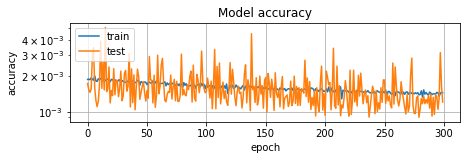

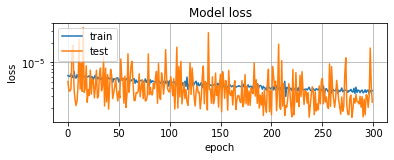

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.subplot(2, 1, 1)
plt.plot(history.history['MAE'])
plt.plot(history.history['val_MAE'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.yscale('log')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale('log')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [32]:
# Generate predictions
predictions = model.predict(X_test_norm)

In [33]:
mySubmission = sampleSabmission
mySubmission["Predicted"] = predictions

mySubmission.head()

filename = 'IvanPredictions_6.csv'

mySubmission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: IvanPredictions_6.csv
